In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.examples.tutorials.mnist import input_data
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
mnist.train.images.shape

(55000, 784)

In [4]:
x_train = mnist.train.images
x_test = mnist.test.images
y_train = mnist.train.labels
y_test = mnist.test.labels

In [5]:
x_train.shape # 로우 하나가 이미지 하나를 의미한다.

(55000, 784)

In [6]:
y_train.shape # one hot encoding으로 제공된다 

(55000, 10)

In [7]:
# 다중분류 : softmax 사용
x = tf.placeholder(tf.float32,[None,784])
y = tf.constant(y_train, tf.float32)

In [8]:
tf.__version__

'1.15.0'

In [9]:
tf.get_variable

<function tensorflow.python.ops.variable_scope.get_variable(name, shape=None, dtype=None, initializer=None, regularizer=None, trainable=None, collections=None, caching_device=None, partitioner=None, validate_shape=True, use_resource=None, custom_getter=None, constraint=None, synchronization=<VariableSynchronization.AUTO: 0>, aggregation=<VariableAggregation.NONE: 0>)>

In [10]:
# 딥러닝을 안할시에는 밑의 코드 사용
# w = tf.Variable(tf.random_uniform([784,10]))
# b = tf.Variable(tf.random_uniform([10]))

# w1 = tf.Variable(tf.random_uniform([784,10]))
# b1 = tf.Variable(tf.random_uniform([10]))
# w2 = tf.Variable(tf.random_uniform([100,10]))
# b2 = tf.Variable(tf.random_uniform([10]))
# 784,10은 맞추고 나머지는 하이퍼파라미터로 설정
w1 = tf.get_variable( 'w1',[784,100], initializer=tf.contrib.layers.xavier_initializer()) 
b1 = tf.get_variable( 'b1',[100], initializer=tf.contrib.layers.xavier_initializer())
w2 = tf.get_variable( 'w2',[100,10], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable( 'b2',[10], initializer=tf.contrib.layers.xavier_initializer())


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [11]:
z1 = tf.matmul(x,w1)+b1
lay1 = tf.nn.relu(z1) # 확률값 추출 # 학습이 잘 안된다면 relu를 사용할 필요가 있다. 하지만 최종은 softmax를 사용

In [12]:
z2 = tf.matmul(lay1,w2)+b2
hx = tf.nn.softmax(z2)

In [13]:
cost_i=tf.nn.softmax_cross_entropy_with_logits(logits=z2,labels=y)
cost = tf.reduce_mean( cost_i )

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [14]:
optimizer = tf.train.GradientDescentOptimizer(0.1) #learning rate
train = optimizer.minimize(cost)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [15]:
for i in range(1000):
    sess.run(train,{x:x_train})
    print(i,sess.run(cost, {x:x_train}))

0 2.270411
1 2.1789641
2 2.101808
3 2.030565
4 1.9622352
5 1.8954581
6 1.8299409
7 1.7655761
8 1.702594
9 1.6413369
10 1.5821023
11 1.5251667
12 1.4706892
13 1.418769
14 1.3694724
15 1.322776
16 1.2786577
17 1.2370684
18 1.1979442
19 1.1611854
20 1.1266565
21 1.09428
22 1.0639147
23 1.0354416
24 1.008727
25 0.9836521
26 0.96009773
27 0.93796366
28 0.9171459
29 0.8975406
30 0.8790569
31 0.8616093
32 0.8451274
33 0.8295435
34 0.8147902
35 0.80080754
36 0.7875361
37 0.77492684
38 0.7629317
39 0.7515107
40 0.7406229
41 0.7302316
42 0.7203061
43 0.71081334
44 0.7017283
45 0.6930258
46 0.6846798
47 0.6766688
48 0.66897494
49 0.6615756
50 0.6544567
51 0.64760184
52 0.640995
53 0.634624
54 0.6284767
55 0.6225405
56 0.61680555
57 0.6112626
58 0.6059023
59 0.6007136
60 0.59568936
61 0.5908226
62 0.58610535
63 0.58153003
64 0.5770896
65 0.57277864
66 0.5685904
67 0.56452
68 0.560563
69 0.5567142
70 0.5529692
71 0.54932356
72 0.5457734
73 0.5423161
74 0.5389479
75 0.53566444
76 0.53246355
77 0.529

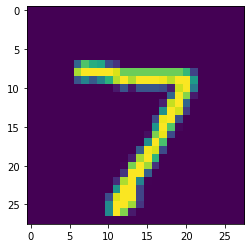

In [18]:
plt.imshow(x_test[0].reshape(28,28))
plt.show()

In [19]:
sess.run(hx,{x:x_test[[0]]})

array([[7.1810362e-05, 9.9306376e-08, 3.4412558e-04, 1.6096429e-03,
        1.1183321e-06, 4.2345291e-05, 2.1878176e-08, 9.9758363e-01,
        7.3820056e-06, 3.3985960e-04]], dtype=float32)

In [20]:
sess.run(hx,{x:x_test[[0]]}).argmax(axis=1)

array([7], dtype=int64)

In [21]:
# 정확도 
aa = sess.run(hx,{x:x_test[[0]]})
h = aa.argmax(axis=1)

In [22]:
bb = y_test.argmax(axis=1)

In [23]:
(h==bb).mean()

0.1028

In [24]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam